<a href="https://colab.research.google.com/github/anubrata01/Data-mining-college-Assignment/blob/main/Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Dataset

**Dataset Description**
<br>
Overview
<br>
The data has been split into two groups:
<br>

* training set (train.csv)
* test set (test.csv)
<br>
This dataset is all the details about pasenges who servived and who died in the accident.

In [ ]:
import pandas as pd

## Importing datasets

In [ ]:
data_train = pd.read_csv('/content/drive/MyDrive/dataset/titanic dataset/titanic/train.csv')
data_test = pd.read_csv('/content/drive/MyDrive/dataset/titanic dataset/titanic/test.csv')

## Get to know the dataset

In [ ]:
data_train.head() # To ovserve 1st few rows.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data_train.shape # To know the shape of the dataset.

(891, 12)

**Train dataset contains 12 columns and 891 rows**

In [ ]:
data_train.info() # To know the information of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
print(f"Survived :{data_train['Survived'].unique()}")
print(f"Pclass :{data_train['Pclass'].unique()}")
print(f"Sex :{data_train['Sex'].unique()}")

Survived :[0 1]
Pclass :[3 1 2]
Sex :['male' 'female']


**There is 3 type of Datatypes**
1. int = Numarical
2. object = Catagorical(Survived is also a catagorical even it dtype is init)
3. Mixed = this are neither fall into Numarical or Catagorical such as "name","Ticket",We can not perform numerical or catagorical on them. We will discuss about it later.
<br>
**Lets seperate the attributes**
* Numerical = passengerId,Age,Sibsp,Parch,Fare
* Catagorical = Sex,Survived,Pclass,Cabin,Embarked
* mixed = Name,Ticket


**Notes**
- Even if Pclass and Survived is int datatype but they fall in catagoricals because they have catagory like class have(1,2,3) , and for servived it have (0,1)


In [ ]:
# storing catagorical in different datafame
catagorical = data_train[['Survived','Pclass','Sex','Cabin','Embarked']]
# Storing numerical in the numerical dataframe
numerical = data_train[['PassengerId','Age','SibSp','Parch','Fare']]

In [ ]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Same column as train dataset**

### Checking the Null values

In [ ]:
for i in data_train.columns:
  print(f"{i} : {data_train[i].isnull().sum()}")

PassengerId : 0
Survived : 0
Pclass : 0
Name : 0
Sex : 0
Age : 177
SibSp : 0
Parch : 0
Ticket : 0
Fare : 0
Cabin : 687
Embarked : 2


**Observation**
- Age, Cabin , Embarked have missing values.
- Embarked is will not cause any problem because only 2 missing value. But Age can cause problem , Hence we will handle missing values later.
- But for cabin we will ignore missing values to try to observer with all we got in cabin.Replacing might cause problem in the dataset.

In [ ]:
for i in data_test.columns:
  print(f"{i} : {data_test[i].isnull().sum()}")

PassengerId : 0
Pclass : 0
Name : 0
Sex : 0
Age : 86
SibSp : 0
Parch : 0
Ticket : 0
Fare : 1
Cabin : 327
Embarked : 0


more of less same for the test dataset , age and cabin have missing values.

## EDA (Exploratry data analysis)


### Univariate Analysis for catagorical

**Univarite analysis includes**
- For Catagorical
  - Frequency Distribution
  -pie chart
  - value counts

#### Frequency Distribution

In [ ]:
catagorical.columns

Index(['Survived', 'Pclass', 'Sex', 'Cabin', 'Embarked'], dtype='object')

In [ ]:
catagorical['Survived'].value_counts()

,count
Survived,
0,549
1,342


**graph**

In [ ]:
import matplotlib.pyplot as plt

<Axes: xlabel='Survived'>

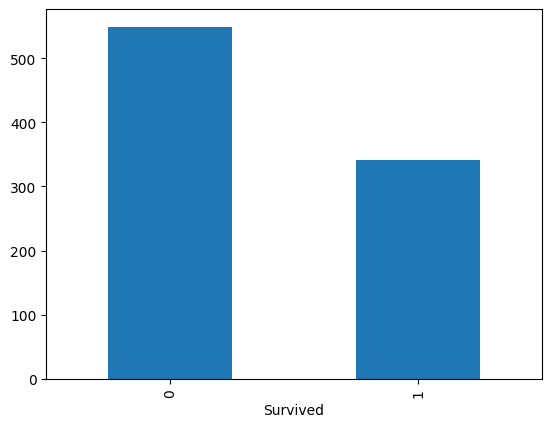

In [ ]:
catagorical['Survived'].value_counts().plot(kind='bar')

In [ ]:
catagorical['Pclass'].value_counts().sort_values()

,count
Pclass,
2,184
1,216
3,491


**Graph**

<Axes: xlabel='Pclass'>

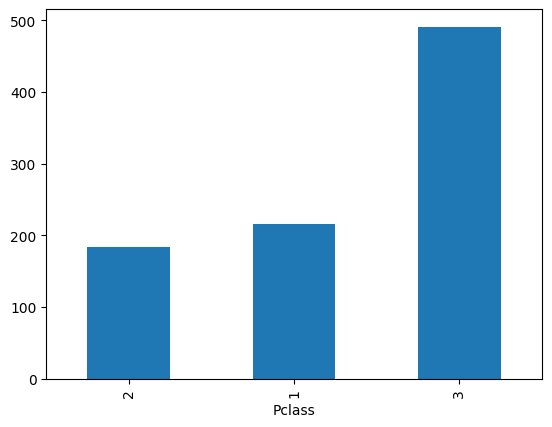

In [ ]:
catagorical['Pclass'].value_counts().sort_values().plot(kind='bar')

**Observation**
- class 3 have more pasengers
- then class 1 have more pasengers , generally after class 3 , class 2 should have most pasengers , but didn't happen so maybe **fair price** can be responsible.

In [ ]:
catagorical['Sex'].value_counts()

,count
Sex,
male,577
female,314


<Axes: xlabel='Sex'>

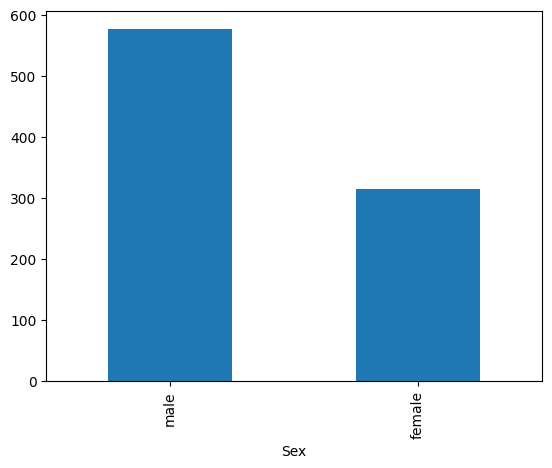

In [ ]:
catagorical['Sex'].value_counts().plot(kind='bar')

**Male dominated dataset**

In [ ]:
catagorical['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In the **Titanic dataset**, the "Embarked" column indicates the port where a passenger boarded the ship.
- "C" representing Cherbourg
- "Q" representing Queenstown (now Cobh, Ireland)
- "S" representing Southampton.

<Axes: xlabel='Embarked'>

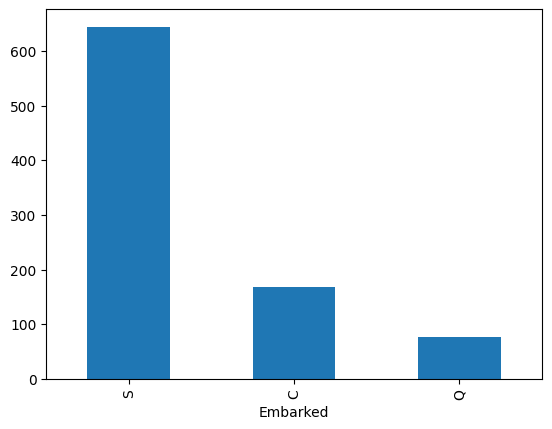

In [ ]:
catagorical['Embarked'].value_counts().plot(kind='bar')

as titanic started from Southampton, England, "s" have most pasengers.

In [ ]:
catagorical['Cabin'].value_counts()

,count
Cabin,
B96 B98,4
G6,4
C23 C25 C27,4
C22 C26,3
F33,3
...,...
E34,1
C7,1
C54,1


Cabin can be confusing so we will drop kebin coulmn. because cabin neither catagorical or numerical. It falls into mixed caatagory . have so many null values . Hence we will drop this column.

In [ ]:
catagorical.drop('Cabin',axis=1,inplace=True)

<ipython-input-40-fb1996a23719>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catagorical.drop('Cabin',axis=1,inplace=True)


#### Pie chart

<Axes: ylabel='count'>

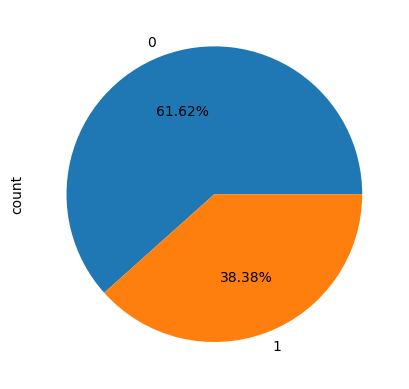

In [ ]:
catagorical['Survived'].value_counts().plot(kind='pie',autopct='%.2f%%')

only 38% people have survived.

<Axes: ylabel='count'>

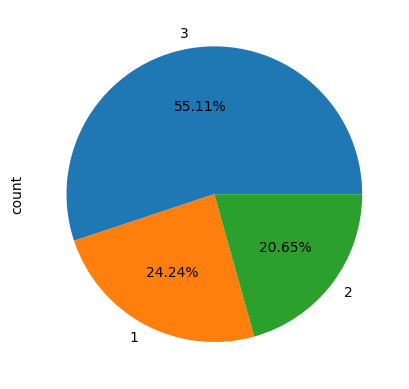

In [ ]:
catagorical['Pclass'].value_counts().plot(kind='pie',autopct='%.2f%%')

- 3 rd class have most = 55%
- 1 st class have 2nd height = 24%
- 2 nd class have 3rd height = 20%

<Axes: ylabel='count'>

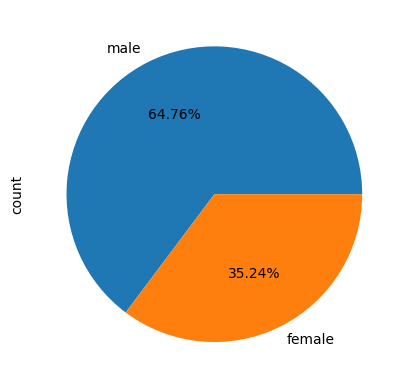

In [ ]:
catagorical['Sex'].value_counts().plot(kind='pie',autopct='%.2f%%')

### Univarite for Numerical

**This includes**
- Mean, median ,mode,range
- histogram, boxplot(to detect outlier)